# Tags Analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_dir = "../data/oct24_clean/"

games = pd.read_csv(data_dir + "games.csv")
genres = pd.read_csv(data_dir + "genres_translated.csv")
spy = pd.read_csv(data_dir + "steamspy_insights.csv") 
prom = pd.read_csv(data_dir + "promotional.csv")
tags = pd.read_csv(data_dir + "tags.csv")

## Tag Co-Occurence

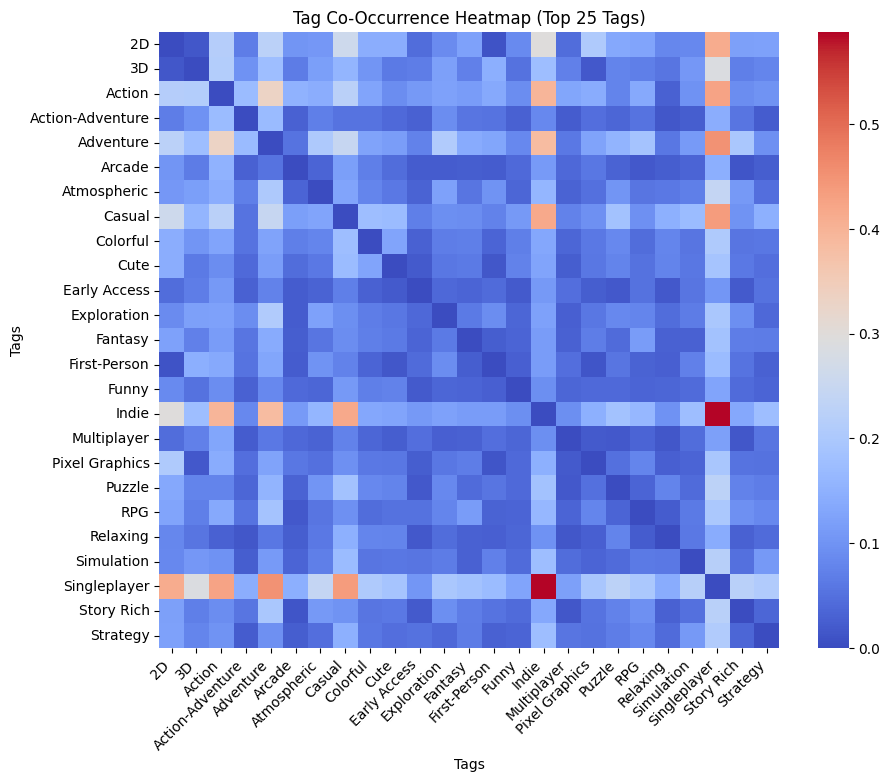

In [ ]:
top_n = 25
tag_counts = tags["tag"].value_counts()
top_tags = tag_counts.nlargest(top_n).index

# Filter the dataset to include only these top tags
filtered_df = tags[tags["tag"].isin(top_tags)]

# Compute the matrix
co_mat = pd.crosstab(filtered_df["app_id"], filtered_df["tag"])
co_mat = co_mat.T.dot(co_mat)

# Normalize
co_mat = co_mat / co_mat.max().max()

# Zero out diagonal
np.fill_diagonal(co_mat.values, 0.0)

# Plot the Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(co_mat, cmap="coolwarm", annot=False, xticklabels=True, yticklabels=True)
plt.title("Tag Co-Occurrence Heatmap (Top {} Tags)".format(top_n))
plt.xlabel("Tags")
plt.ylabel("Tags")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

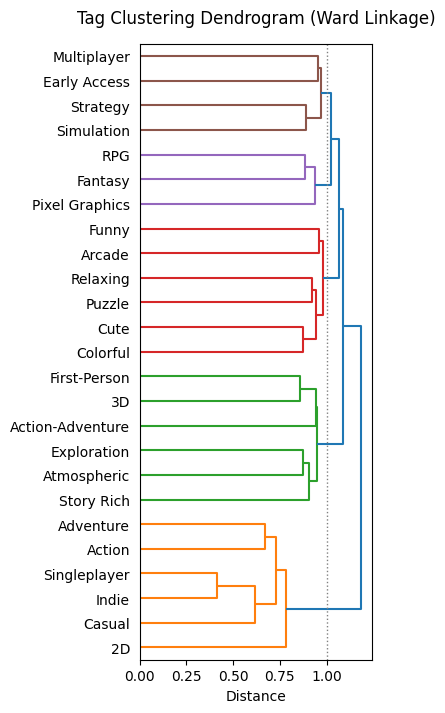

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import squareform

# Convert similarity to distance
distance_matrix = 1 - co_mat

# Convert to condensed format (required for linkage)
condensed_dist = squareform(distance_matrix, checks=False)

# Perform clustering
linkage_matrix = linkage(condensed_dist, method='ward')

plt.figure(figsize=(3, 8))
threshold = 1.0
dendrogram(linkage_matrix, labels=co_mat.index, leaf_rotation=0, orientation="right", color_threshold=threshold)
plt.axvline(threshold, color="gray", ls=":", linewidth=1)
plt.title("Tag Clustering Dendrogram (Ward Linkage)", y=1.02)
plt.xlabel("Distance")
plt.show()

## 2D vs. 3D

## Relation to Concurrent Users